In [1]:

#NER ANALYSIS Second Debate

In [2]:
import pandas as pd

In [3]:

# Read csv file
file=('Resources/second_debate.csv')
first_df=pd.read_csv(file)
first_df.head()

,tweet,replies_count,retweets_count,likes_count,candidate,tweet_length,Subjectivity,Polarity,Sentiment
0,So why was trump elected,0,0,0,Biden,5,0.000000,0.000000,Neutral
1,Oklahoma early voting is October 29 30 and 31...,0,0,0,Biden,15,0.300000,0.100000,Positive
2,Open the state,0,0,0,Biden,3,0.500000,0.000000,Neutral
3,if you haven noticed more than half the count...,0,1,0,Biden,20,0.222222,0.111111,Positive
4,It came down to muting the president That what...,0,1,1,Biden,40,0.489815,0.028241,Positive


In [4]:
# Separating entire dataset to sentiments for Trump and Biden
biden_sentiment=first_df[(first_df['candidate']=='Biden')]
trump_sentiment=first_df[(first_df['candidate']=='Trump')]

In [5]:
# As datasets are large, we decided to choose a fraction of each dataset
biden_sentiment=biden_sentiment.sample(frac = 0.1)
trump_sentiment=trump_sentiment.sample(frac = 0.1)

In [6]:
import spacy
from spacy import displacy

In [7]:
nlp=spacy.load('en_core_web_sm')

In [8]:
entities = []
labels = []
def ner_table(row):
    ner_table=row['tweet']
    for sentence in ner_table:
        doc=nlp(sentence)
        for ent in doc.ents:
            entities.append(ent)
            labels.append(ent.label_)
    return ('NER Complete')

In [9]:
# Running NER function on biden database
ner_table(biden_sentiment)

'NER Complete'

In [10]:

# Creating dataframe with entities and labels columns
df_biden = pd.DataFrame({'Entities':entities,'Labels':labels})
df_biden

,Entities,Labels
0,(Biden),LOC
1,"(6, to, 4)",CARDINAL
2,(10),CARDINAL
3,(Pittsburgh),GPE
4,(today),DATE
...,...,...
15084,"(Tucker, Carlson)",PERSON
15085,"(Joe, Biden)",PERSON
15086,(Twitter),ORG
15087,(Facebook),PRODUCT


In [11]:
# Grouping by Labels
df_biden_labels = df_biden.groupby(["Labels"]).count()["Entities"]
df_biden_labels

Labels
CARDINAL       1307
DATE           1247
EVENT            51
FAC              94
GPE            1646
LANGUAGE          8
LAW              45
LOC             372
MONEY            47
NORP           1115
ORDINAL         182
ORG            2331
PERCENT           8
PERSON         6065
PRODUCT          80
QUANTITY         33
TIME            367
WORK_OF_ART      91
Name: Entities, dtype: int64

In [12]:
# Creating dataframe from sorted table
df = pd.DataFrame(df_biden_labels)
df

,Entities
Labels,
CARDINAL,1307
DATE,1247
EVENT,51
FAC,94
GPE,1646
LANGUAGE,8
LAW,45
LOC,372
MONEY,47


In [13]:
# Sorting Labels by count
df=df.sort_values(["Entities"], ascending=False)
df

,Entities
Labels,
PERSON,6065
ORG,2331
GPE,1646
CARDINAL,1307
DATE,1247
NORP,1115
LOC,372
TIME,367
ORDINAL,182


In [14]:
# Only using the top 10 Labels
biden_labels=df.head(10)
biden_labels

,Entities
Labels,
PERSON,6065
ORG,2331
GPE,1646
CARDINAL,1307
DATE,1247
NORP,1115
LOC,372
TIME,367
ORDINAL,182


In [15]:
# Import Dependency to plot bar chart
import matplotlib.pyplot as plt

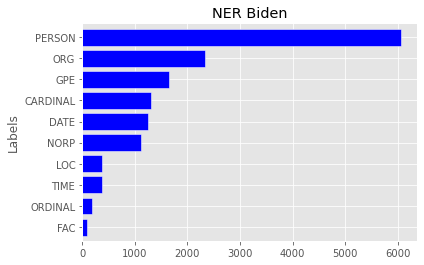

In [16]:
plt.style.use('ggplot')
biden_labels.plot(kind='barh', legend= False, color='blue', edgecolor='white',
                  width=0.8, title='Biden NER')
plt.gca().invert_yaxis()
plt.title('NER Biden')
plt.show()

In [17]:

# Choose one at a time
# spacy.explain("PERSON")
# spacy.explain("ORG")
# spacy.explain("GPE")
# spacy.explain("CARDINAL")
# spacy.explain("NORP")
# spacy.explain("DATE")
# spacy.explain("TIME")
# spacy.explain("LOC")
# spacy.explain("ORDINAL")
# spacy.explain("FAC")

In [18]:

# Running NER function on biden database
ner_table(trump_sentiment)

'NER Complete'

In [19]:
# Creating dataframe with entities and labels columns
df_trump = pd.DataFrame({'Entities':entities,'Labels':labels})
df_trump

,Entities,Labels
0,(Biden),LOC
1,"(6, to, 4)",CARDINAL
2,(10),CARDINAL
3,(Pittsburgh),GPE
4,(today),DATE
...,...,...
35344,"(400, 000, year)",DATE
35345,(three),CARDINAL
35346,"(bidens, ex)",ORG
35347,(3),CARDINAL


In [20]:

# Grouping by Labels
df_trump_labels = df_trump.groupby(["Labels"]).count()["Entities"]
df_trump_labels

Labels
CARDINAL        3679
DATE            3103
EVENT            121
FAC              224
GPE             4161
LANGUAGE          32
LAW              109
LOC              929
MONEY            107
NORP            2810
ORDINAL          462
ORG             5965
PERCENT           30
PERSON         12230
PRODUCT          233
QUANTITY          92
TIME             822
WORK_OF_ART      240
Name: Entities, dtype: int64

In [21]:
# Creating dataframe from sorted table
df = pd.DataFrame(df_trump_labels)
df

,Entities
Labels,
CARDINAL,3679
DATE,3103
EVENT,121
FAC,224
GPE,4161
LANGUAGE,32
LAW,109
LOC,929
MONEY,107


In [22]:

# Sorting Labels by count
df=df.sort_values(["Entities"], ascending=False)
df

,Entities
Labels,
PERSON,12230
ORG,5965
GPE,4161
CARDINAL,3679
DATE,3103
NORP,2810
LOC,929
TIME,822
ORDINAL,462


In [23]:
# Only using the top 10 Labels
trump_labels=df.head(10)
trump_labels

,Entities
Labels,
PERSON,12230
ORG,5965
GPE,4161
CARDINAL,3679
DATE,3103
NORP,2810
LOC,929
TIME,822
ORDINAL,462


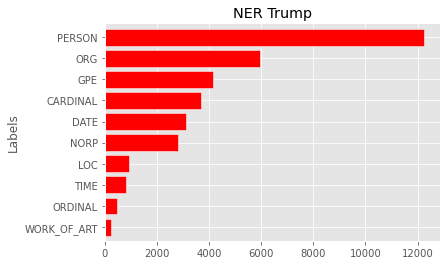

In [24]:

plt.style.use('ggplot')

trump_labels.plot(kind='barh', legend= False, color='red', edgecolor='white',
                  width=0.8)
plt.gca().invert_yaxis()
plt.title('NER Trump')
plt.show()

In [25]:

# Choose one at a time
# spacy.explain("PERSON")
spacy.explain("ORG")
# spacy.explain("GPE")
# spacy.explain("CARDINAL")
# spacy.explain("NORP")
# spacy.explain("DATE")
# spacy.explain("TIME")
# spacy.explain("LOC")
# spacy.explain("ORDINAL")
# spacy.explain("FAC")

'Companies, agencies, institutions, etc.'

In [26]:

biden_labels=biden_labels.rename(columns={"Entities": "Biden"})
biden_labels

,Biden
Labels,
PERSON,6065
ORG,2331
GPE,1646
CARDINAL,1307
DATE,1247
NORP,1115
LOC,372
TIME,367
ORDINAL,182


In [27]:

trump_labels=trump_labels.rename(columns={"Entities": "Trump"})
trump_labels

,Trump
Labels,
PERSON,12230
ORG,5965
GPE,4161
CARDINAL,3679
DATE,3103
NORP,2810
LOC,929
TIME,822
ORDINAL,462


In [28]:
NER_Table = biden_labels.merge(trump_labels, on='Labels', how='left')
NER_Table

,Biden,Trump
Labels,,
PERSON,6065,12230.0
ORG,2331,5965.0
GPE,1646,4161.0
CARDINAL,1307,3679.0
DATE,1247,3103.0
NORP,1115,2810.0
LOC,372,929.0
TIME,367,822.0
ORDINAL,182,462.0


In [29]:
NER_Table.to_csv(r'C:\Users\kevin\Documents\myrepo\Final-Project\Resources\Second_Debate_ner_table.csv', index = True, header=True)